<h1>Data Preprocessing:</h1>

In [120]:
from sklearn.impute import KNNImputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import copy

# Read the data and drop unneeded columns
df = pd.read_csv('car_data.csv')
df=df.drop(columns=['make','model','year'])

cols = list(df.columns)
df = df[cols[0:2]+cols[3:]+[cols[2]]]

# Convert categorical columns to codes and store mappings
df['transmission'] = df['transmission'].astype('category')
mappingT = dict(enumerate(df['transmission'].cat.categories))
df['transmission'] = df['transmission'].cat.codes
print("codes to categories:", mappingT)
print()
df['class'] = df['class'].astype('category')
mappingC = dict(enumerate(df['class'].cat.categories))
print("codes to categories:", mappingC)
df['class'] = df['class'].cat.codes
print()
df['drive'] = df['drive'].astype('category')
mappingD = dict(enumerate(df['drive'].cat.categories))
print("codes to categories:", mappingD)
df['drive'] = df['drive'].cat.codes
print()
df['fuel_type'] = df['fuel_type'].astype('category')
mappingF = dict(enumerate(df['fuel_type'].cat.categories))
print("codes to categories:", mappingF)
df['fuel_type'] = df['fuel_type'].cat.codes
print()
print(df)

# Convert DataFrame to numpy array
df_np = df.to_numpy()

# Impute missing values using KNNImputer
imputer = KNNImputer(n_neighbors=4)
df_imputed = imputer.fit_transform(df_np)

# Verify no missing values remain
print(np.isnan(df_imputed).sum())

print(df_imputed)

codes to categories: {0: 'a', 1: 'm'}

codes to categories: {0: 'compact car', 1: 'large car', 2: 'midsize car', 3: 'midsize station wagon', 4: 'minicompact car', 5: 'minivan', 6: 'small pickup truck', 7: 'small sport utility vehicle', 8: 'small station wagon', 9: 'standard pickup truck', 10: 'standard sport utility vehicle', 11: 'subcompact car', 12: 'two seater'}

codes to categories: {0: '4wd', 1: 'awd', 2: 'fwd', 3: 'rwd'}

codes to categories: {0: 'diesel', 1: 'electricity', 2: 'gas'}

     class  cylinders  displacement  drive  fuel_type  transmission  \
0        2        4.0           2.5      2          2             1   
1        2        4.0           2.5      2          2             0   
2        7        4.0           2.5      2          2             0   
3        7        4.0           2.0      2          2             1   
4        7        4.0           2.0      2          2             0   
..     ...        ...           ...    ...        ...           ...   
545    

<h1>Plot Graph:</h1>

[-1.16270629e-16  1.03351671e-16  1.93784382e-16  2.06703341e-16
 -6.45947942e-17  5.42596271e-16 -3.87568765e-17  4.52163559e-17]
[1. 1. 1. 1. 1. 1. 1. 1.]
(550, 8)
(550,)


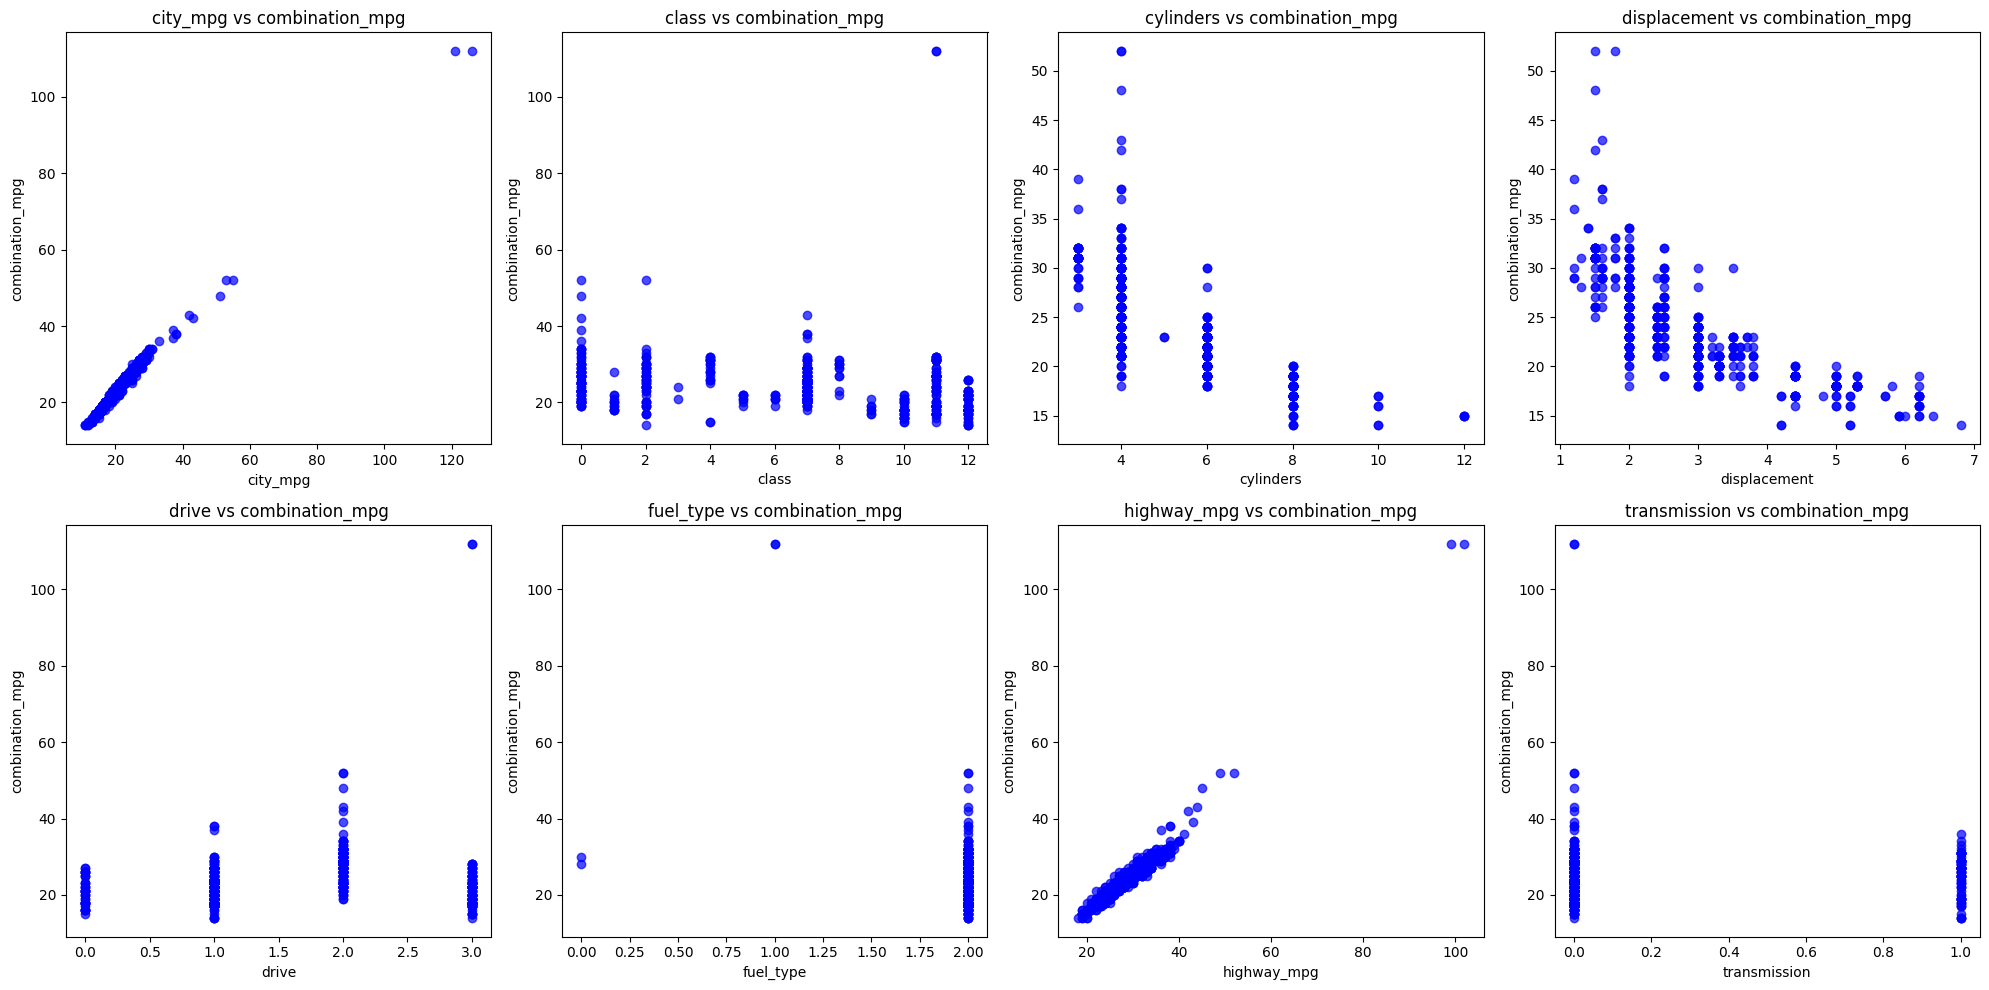

In [116]:
x_train = df_imputed[:,:8]
y_train = df_imputed[:,-1]

#normalize the feature
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train-mean)/std

print(np.mean(x_train, axis=0))
print(np.std(x_train, axis=0))

print(x_train.shape)
print(y_train.shape)

features = ["city_mpg", "class", "cylinders", "displacement", "drive", "fuel_type", "highway_mpg", "transmission"]
target = "combination_mpg"

# Create subplots (2 rows, 4 columns)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  
axes = axes.flatten()  # Flatten to iterate easily

# Plot each feature against the target variable
for i, feature in enumerate(features):
    axes[i].scatter(df[feature], df[target], alpha=0.7, color='b')  # Scatter plot
    axes[i].set_title(f"{feature} vs {target}")  # Title
    axes[i].set_xlabel(feature)  # X-axis label
    axes[i].set_ylabel(target)  # Y-axis label

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [107]:
#Function to calculate the cost
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost=0

    for i in range (m):
        f_wb= np.dot(w, x[i]) + b
        cost = cost + (f_wb - y[i])**2
    total_cost= 1/(2*m)*cost

    return total_cost

#Function to calculate derivatives of gradient descent
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw = np.zeros_like(w,dtype=float)
               ########################
    dj_db = 0

    for i in range(m):
        f_wb = np.dot(w,x[i])+b
        dj_dw_i = (f_wb - y[i])*x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

#Function to calculate gradient descent
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):

    w = copy.deepcopy(w_in)
    b = b_in    
    J_history = []
    p_history = []
    

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        #Save cost J at each iteration
        if i<100000:
            J_history.append(cost_function(x,y,w,b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
            f"dj_dw: {repr(dj_dw)}, dj_db: {dj_db:0.3e}, ",
            f"w: {repr(w)}, b: {b:0.5e}")
                  ######
    return w, b, J_history, p_history #return w and J,w history for graphing   

#initialize parameter
b_init = 0
w_init = np.zeros(x_train.shape[1])
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-3

# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: {', '.join([f'{elem:8.4f}' for elem in w_final])}, {b_final:8.4f}")

Iteration    0: Cost 3.17e+02  dj_dw: array([-7.40933501,  1.42593067,  4.1784705 ,  4.34587302, -1.10974723,
        2.64594741, -7.28279566, -0.42800819]), dj_db: -2.407e+01,  w: array([ 0.00740934, -0.00142593, -0.00417847, -0.00434587,  0.00110975,
       -0.00264595,  0.0072828 ,  0.00042801]), b: 2.40691e-02
Iteration 1000: Cost 4.04e+01  dj_dw: array([-0.97587828, -0.23038532, -0.32005949, -0.29481083,  0.03806759,
       -0.05937816, -0.7287672 ,  0.14507561]), dj_db: -8.850e+00,  w: array([ 2.84400108, -0.09551101, -0.75879713, -0.82822785,  0.29677218,
       -0.74554596,  2.5942296 , -0.06732046]), b: 1.52278e+01
Iteration 2000: Cost 5.75e+00  dj_dw: array([-0.39309115, -0.07144358, -0.23410687, -0.22662294,  0.10117501,
       -0.22523913, -0.22308168,  0.02828259]), dj_db: -3.254e+00,  w: array([ 3.4516598 ,  0.05229121, -0.45814267, -0.54177773,  0.21041987,
       -0.56105103,  2.99649002, -0.14723324]), b: 2.08182e+01
Iteration 3000: Cost 9.50e-01  dj_dw: array([-0.2234

<h1>Convergence of Gradient Descent:</h1>

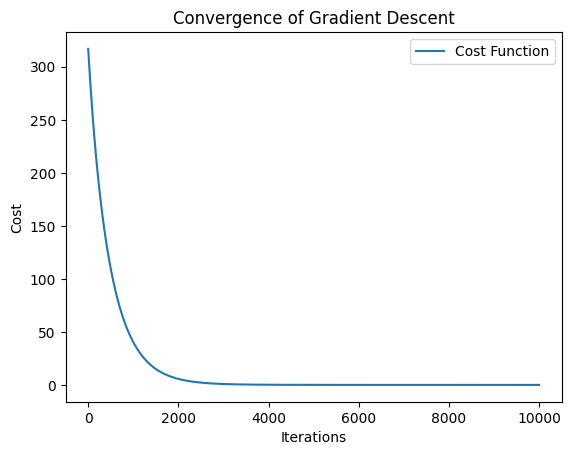

In [108]:
# Plot cost function over iterations
plt.plot(range(len(J_hist)), J_hist, label='Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Convergence of Gradient Descent')
plt.legend()
plt.show()

<h1>Predtion model:</h1>

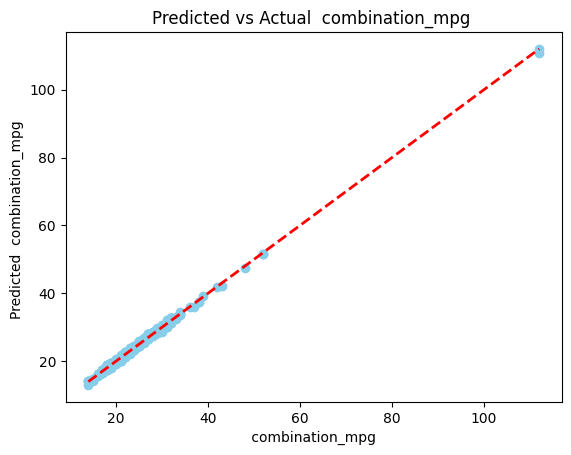

In [112]:
#Final Model
def predict(w_final,b_final,x):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = np.dot(w_final,x[i]) + b_final

    return f_wb

y_pred = predict(w_final,b_final,x_train)

# Visualize predictions vs actual
plt.scatter(y_train, y_pred, color='skyblue', marker = 'o')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2)
plt.xlabel(' combination_mpg ')
plt.ylabel('Predicted  combination_mpg ')
plt.title('Predicted vs Actual  combination_mpg ')
plt.show()

<h1>Model Accuracy:</h1>

In [111]:
# Calculate R-squared (R²)
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)  # Residual sum of squares
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)  # Total sum of squares
    return 1 - (ss_res / ss_tot)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Predicted values using your model
y_pred = predict(w_final, b_final, x_train)

# Calculate R² and MAPE
r2 = r_squared(y_train, y_pred)
mape = mean_absolute_percentage_error(y_train, y_pred)

print(f"R-squared (R²): {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


R-squared (R²): 1.00
Mean Absolute Percentage Error (MAPE): 1.49%
